#### Задача 1 

Решение задачи МНК для аппроксимации постоянной величиной

Условие задачи
Дана выборка точек $y_1, y_2, \dots, y_n$.  
Найти постоянную величину $a$, минимизирующую функцию потерь:

$$
L(a) = \sum_{i=1}^n (y_i - a)^2
$$

Решение

1. Функция потерь
$$
L(a) = \sum_{i=1}^n (y_i - a)^2
$$

2. Производная функции потерь
$$
\frac{dL}{da} = \sum_{i=1}^n 2(y_i - a)(-1) = -2\sum_{i=1}^n (y_i - a)
$$

3. Условие минимума
Приравниваем производную к нулю:
$$
-2\sum_{i=1}^n (y_i - a) = 0
$$

Выносим постоянный член:
$$
\sum_{i=1}^n y_i - n \cdot a = 0
$$

4. Находим оптимальное значение $a$
$$
n \cdot a = \sum_{i=1}^n y_i
$$

$$
a = \frac{1}{n}\sum_{i=1}^n y_i
$$

Ответ
Оптимальная постоянная величина, минимизирующая сумму квадратов отклонений, равна **среднему арифметическому** выборки:

$$
\boxed{a = \frac{1}{n}\sum_{i=1}^n y_i}
$$

МНК-прямая всегда проходит через центр масс данных

1. Продифференцируем целевую функцию по $a$ и $b$:

**По параметру $b$:**
$$\frac{\partial}{\partial b} \sum_{i=1}^n (y_i - ax_i - b)^2 = -2\sum_{i=1}^n (y_i - ax_i - b) = 0$$
$$\Rightarrow \sum_{i=1}^n y_i - a\sum_{i=1}^n x_i - nb = 0$$

$$n\bar{y} - an\bar{x} - nb = 0$$
$$\bar{y} - a\bar{x} - b = 0$$
$$b = \bar{y} - a\bar{x}$$

2. Подставим $x = \bar{x}, \ y = \bar{y}$:
$$\bar{y} = a(\bar{x} - \bar{x}) + \bar{y} = \bar{y}$$

Таким образом, точка $(\bar{x}, \bar{y})$ удовлетворяет уравнению МНК-прямой.

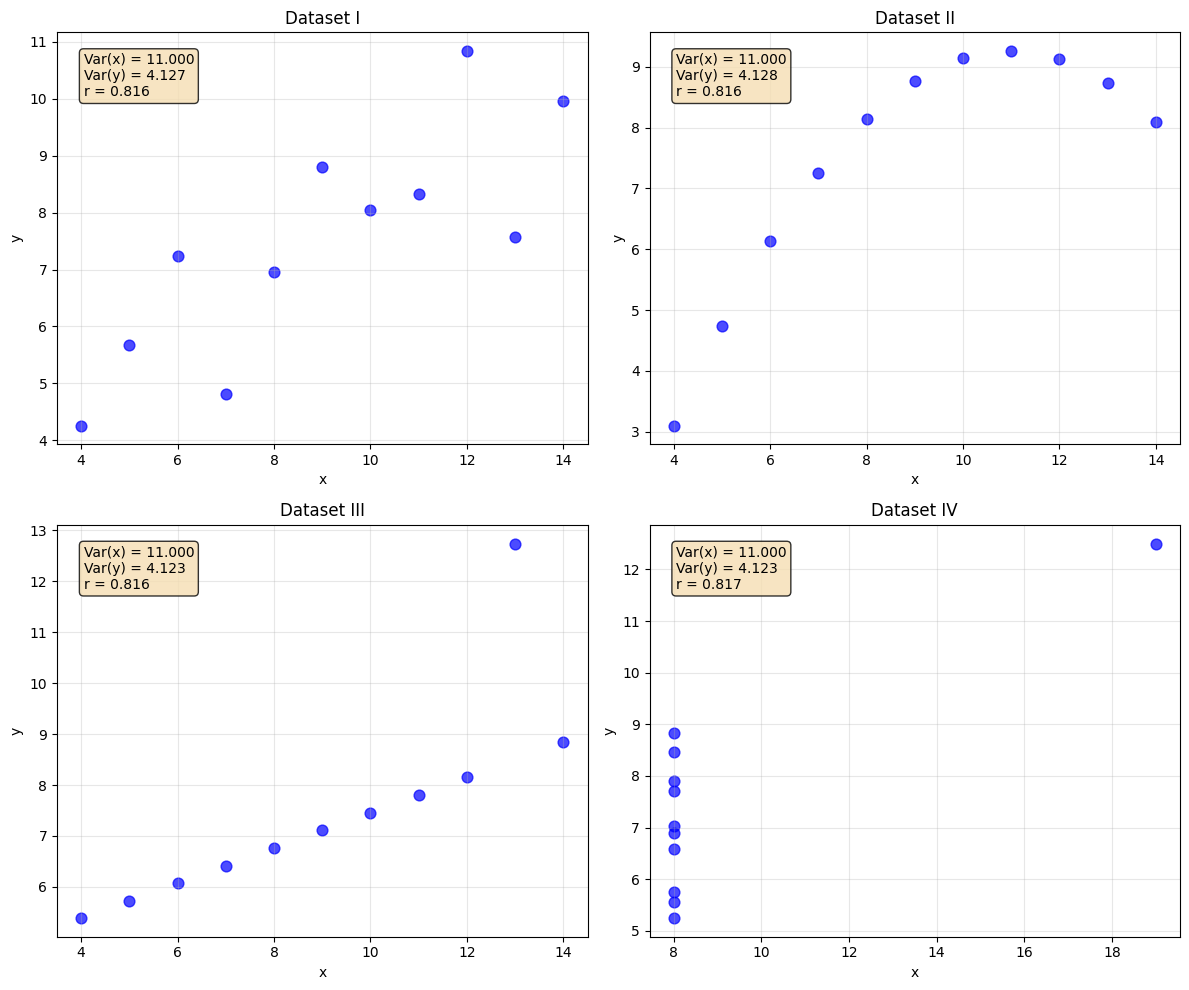

Статистики квартета Энскомба:
Dataset  Var(x)   Var(y)  Correlation
      I    11.0 4.127269     0.816421
     II    11.0 4.127629     0.816237
    III    11.0 4.122620     0.816287
     IV    11.0 4.123249     0.816521

Проверка идентичности средних значений:
Dataset I: mean(x) = 9.00, mean(y) = 7.50
Dataset II: mean(x) = 9.00, mean(y) = 7.50
Dataset III: mean(x) = 9.00, mean(y) = 7.50
Dataset IV: mean(x) = 9.00, mean(y) = 7.50


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

anscombe = sns.load_dataset('anscombe')

results = []

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    data = anscombe[anscombe['dataset'] == dataset]
    x = data['x'].values
    y = data['y'].values
    
    x_var = np.var(x, ddof=1) 
    y_var = np.var(y, ddof=1)
    correlation = np.corrcoef(x, y)[0, 1]
    
    results.append({
        'Dataset': dataset,
        'Var(x)': x_var,
        'Var(y)': y_var,
        'Correlation': correlation
    })
    
    axes[i].scatter(x, y, color='blue', s=60, alpha=0.7)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Dataset {dataset}')
    axes[i].grid(True, alpha=0.3)

    stats_text = f'Var(x) = {x_var:.3f}\nVar(y) = {y_var:.3f}\nr = {correlation:.3f}'
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print("Статистики квартета Энскомба:")
print(results_df.to_string(index=False))

print("\nПроверка идентичности средних значений:")
for dataset in ['I', 'II', 'III', 'IV']:
    data = anscombe[anscombe['dataset'] == dataset]
    print(f"Dataset {dataset}: mean(x) = {data['x'].mean():.2f}, mean(y) = {data['y'].mean():.2f}")



#### Задача 3


Составим функцию Лагранжа:
$$
\mathcal{L}(w, \lambda) = w^T w + \lambda^T (y - X w)
$$
где $\lambda \in \mathbb{R}^n$ — вектор множителей Лагранжа.

Найдём частные производные:

1) По $w$:
    $$
    \frac{\partial \mathcal{L}}{\partial w} = 2w - X^T \lambda = 0 \quad \Rightarrow \quad w = \frac{1}{2} X^T \lambda
    $$
    
2) По $\lambda$:
    $$
    \frac{\partial \mathcal{L}}{\partial \lambda} = y - X w = 0 \quad \Rightarrow \quad X w = y
    $$

Подставим $w = \frac{1}{2} X^T \lambda$ в $X w = y$:
$$
X \left( \frac{1}{2} X^T \lambda \right) = y \quad \Rightarrow \quad \frac{1}{2} X X^T \lambda = y
$$
$$
X X^T \lambda = 2y
$$

$$
\lambda = 2 (X X^T)^{-1} y
$$

Подставляем обратно в выражение для $w$:
$$
w = \frac{1}{2} X^T \cdot \left[ 2 (X X^T)^{-1} y \right] = X^T (X X^T)^{-1} y
$$


#### Задача 4


Пусть $X \in \mathbb{R}^{l \times F}$ — матрица «объекты–признаки». Её сингулярное разложение:
$$
X = U \sqrt{\Lambda} V^T,
$$

Ошибка восстановления: $X - \hat{X}$.

1) Норма Фробениуса инвариантна относительно умножения на ортогональные матрицы:
$$
\| X - \hat{X} \|_F^2 = \| \sqrt{\Lambda} - \hat{\sqrt{\Lambda}} \|_F^2.
$$

2) Матрица $\sqrt{\Lambda} - \hat{\sqrt{\Lambda}}$ диагональна с элементами:
$$
0, \dots, 0, \sqrt{\lambda}_{\hat{F}+1}, \dots, \sqrt{\lambda_r}, 0, \dots,
$$

4) Норма Фробениуса диагональной матрицы равна корню из суммы квадратов диагональных элементов:
$$
\| \sqrt{\Lambda} - \hat{\sqrt{\Lambda}} \|_F^2 = \sum_{i=\hat{F}+1}^{r} \lambda_i.
$$


1) Рассмотрим сингулярное разложение матрицы $X$:
$$
X = U\Sigma V^T,
$$
где $U$ и $V$ — ортогональные матрицы, $\Sigma$ — диагональная матрица сингулярных чисел $\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r \ge 0$.

2) Для любого единичного вектора $u$ ($\|u\|=1$) имеем:
$$
\|Xu\|^2 = u^T X^T X u.
$$

3) Подставим SVD разложение:
$$
X^T X = (U\Sigma V^T)^T (U\Sigma V^T) = V\Sigma^T U^T U\Sigma V^T = V\Sigma^2 V^T.
$$

4) Сделаем замену переменных: $v = V^T u$. Так как $V$ ортогональна, то $\|v\| = \|u\| = 1$.

5) Выразим целевую функцию через $v$:
$$
u^T X^T X u = u^T V\Sigma^2 V^T u = v^T \Sigma^2 v = \sum_{i=1}^r \sigma_i^2 v_i^2.
$$

6) Задача сводится к максимизации $\sum_{i=1}^r \sigma_i^2 v_i^2$ при условии $\sum_{i=1}^r v_i^2 = 1$.

7) Максимум достигается, когда $v_1 = 1$, $v_2 = v_3 = \dots = v_r = 0$, так как $\sigma_1^2 \ge \sigma_i^2$ для всех $i$.

8) Тогда $v = (1, 0, \dots, 0)^T$ и $u = Vv = v_1$, где $v_1$ — первый столбец $V$, то есть правый сингулярный вектор, соответствующий $\sigma_1$.

9) Таким образом:
$$
\text{argmax}_{\|u\|=1} \|Xu\|^2 = v_1,
$$

C:\Users\user\AppData\Local\Temp\ipykernel_924\1015011650.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, N)


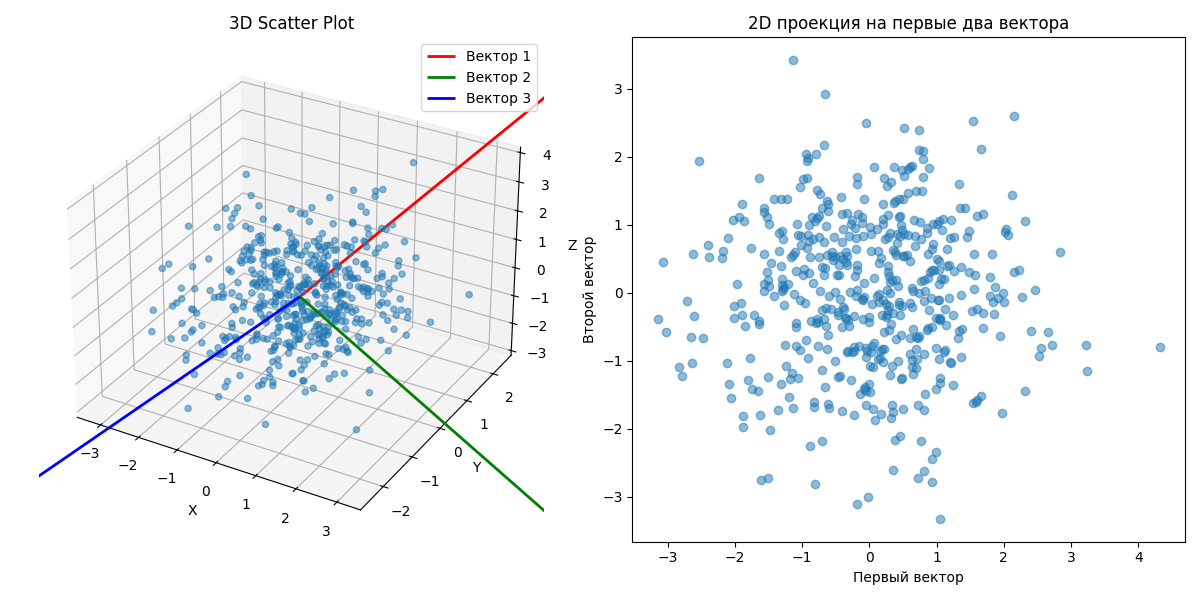

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widgets

np.random.seed(42)
A = np.random.randn(3, 3)
A = (A + A.T) / 2 

N = 500
mean = np.zeros(3)
cov = A
X = np.random.multivariate_normal(mean, cov, N)

X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], alpha=0.5)
colors=['red','green','blue']
for i in range(3):
    ax.quiver(0, 0, 0, Vt[i, 0], Vt[i, 1], Vt[i, 2], length=s[i], color=colors[i], linewidth=2, label=f'Вектор {i+1}')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

ax2 = fig.add_subplot(122)
X_projected = X_centered @ Vt.T
ax2.scatter(X_projected[:, 0], X_projected[:, 1], alpha=0.5)
ax2.set_title('2D проекция на первые два вектора')
ax2.set_xlabel('Первый вектор')
ax2.set_ylabel('Второй вектор')

plt.tight_layout()
plt.show()

#### Задача 5

Матрица объект-признак $X$ размерности $N \times 2$ имеет строки $(x_i, y_i)$:
$$
X = \begin{pmatrix}
x_1 & y_1 \\
x_2 & y_2 \\
\vdots & \vdots \\
x_N & y_N
\end{pmatrix}
$$

Сингулярное разложение:
$$
X = U \Sigma V^T
$$

Прямая $a$, проходящая через начало координат, задается единичным вектором нормали $n = (n_x, n_y)$. Тогда расстояние от точки $(x_i, y_i)$ до прямой:
$$
\text{distance}[(x_i, y_i); a] = |x_i n_x + y_i n_y| = |X_i n|
$$
где $X_i = (x_i, y_i)$ — $i$-я строка матрицы $X$.

Квадрат расстояния:
$$
\text{distance}^2[(x_i, y_i); a] = (X_i n)^2
$$

Сумма квадратов расстояний от всех точек до прямой:
$$
L' = \sum_{i=1}^N (X_i n)^2 = \sum_{i=1}^N n^T X_i^T X_i n = n^T \left(\sum_{i=1}^N X_i^T X_i\right) n
$$

Заметим, что:
$$
\sum_{i=1}^N X_i^T X_i = X^T X
$$

Таким образом:
$$
L' = n^T (X^T X) n
$$

Из SVD: $X^T X = V \Sigma^2 V^T$. Тогда:
$$
L' = n^T V \Sigma^2 V^T n
$$

Сделаем замену переменных: $w = V^T n$. Так как $V$ ортогональна и $\|n\| = 1$, то $\|w\| = 1$.

Тогда:
$$
L' = w^T \Sigma^2 w = \sigma_1^2 w_1^2 + \sigma_2^2 w_2^2
$$

Задача минимизации:
$$
L' = \sigma_1^2 w_1^2 + \sigma_2^2 w_2^2 \quad \longrightarrow \quad \min_{w_1^2 + w_2^2 = 1}
$$

Поскольку $\sigma_1 \geq \sigma_2 \geq 0$, минимум достигается при:
$$
w_1 = 0, \quad w_2 = 1
$$


Для корректного сравнения предположим, что точки уже центрированы (центр масс находится в начале координат):
$$
\frac{1}{N}\sum_{i=1}^N X_{i\alpha} = 0 \quad \text{для } \alpha = 1,2,3
$$

Для системы точечных масс $m_i$ тензор инерции определяется как:
$$
I_{\alpha\beta} = \sum_{i=1}^N (\delta_{\alpha\beta} \|X_i\|^2 - X_{i\alpha}X_{i\beta})
$$

В матричной форме:
$$
I = \left(\sum_{i=1}^N \|X_i\|^2\right) \cdot I_3 - \sum_{i=1}^N X_i X_i^T
$$

Матрица данных $X$ размерности $N \times 3$ имеет строки $X_i$. Тогда:
$$
\sum_{i=1}^N X_i X_i^T = X^T X
$$

Следовательно, тензор инерции выражается как:
$$
I = \left(\sum_{i=1}^N \|X_i\|^2\right) \cdot I_3 - X^T X
$$

Рассмотрим сингулярное разложение матрицы $X$:
$$
X = U \Sigma V^T
$$

Тогда:
$$
X^T X = V \Sigma^T U^T U \Sigma V^T = V \Sigma^2 V^T
$$

$$
\sum_{i=1}^N \|X_i\|^2 = \operatorname{tr}(X^T X) = \lambda_1 + \lambda_2 + \lambda_3
$$

В базисе главных компонент (столбцы $V$):
$$
I = \operatorname{diag}(\lambda_2 + \lambda_3, \lambda_1 + \lambda_3, \lambda_1 + \lambda_2)
$$

Таким образом, главные моменты инерции равны:
$$
I_1 = \lambda_2 + \lambda_3 = \sigma_2^2 + \sigma_3^2
$$
$$
I_2 = \lambda_1 + \lambda_3 = \sigma_1^2 + \sigma_3^2
$$
$$
I_3 = \lambda_1 + \lambda_2 = \sigma_1^2 + \sigma_2^2
$$



Сингулярные числа H_8:
  σ_1 = 1.696e+00
  σ_2 = 2.981e-01
  σ_3 = 2.621e-02
  σ_4 = 1.468e-03
  σ_5 = 5.437e-05
  σ_6 = 1.294e-06
  σ_7 = 1.799e-08
  σ_8 = 1.112e-10
  min(σ) = 1.112e-10

Сингулярные числа H_10:
  σ_1 = 1.752e+00
  σ_2 = 3.429e-01
  σ_3 = 3.574e-02
  σ_4 = 2.531e-03
  σ_5 = 1.287e-04
  σ_6 = 4.730e-06
  σ_7 = 1.229e-07
  σ_8 = 2.147e-09
  σ_9 = 2.267e-11
  σ_10 = 1.093e-13
  min(σ) = 1.093e-13


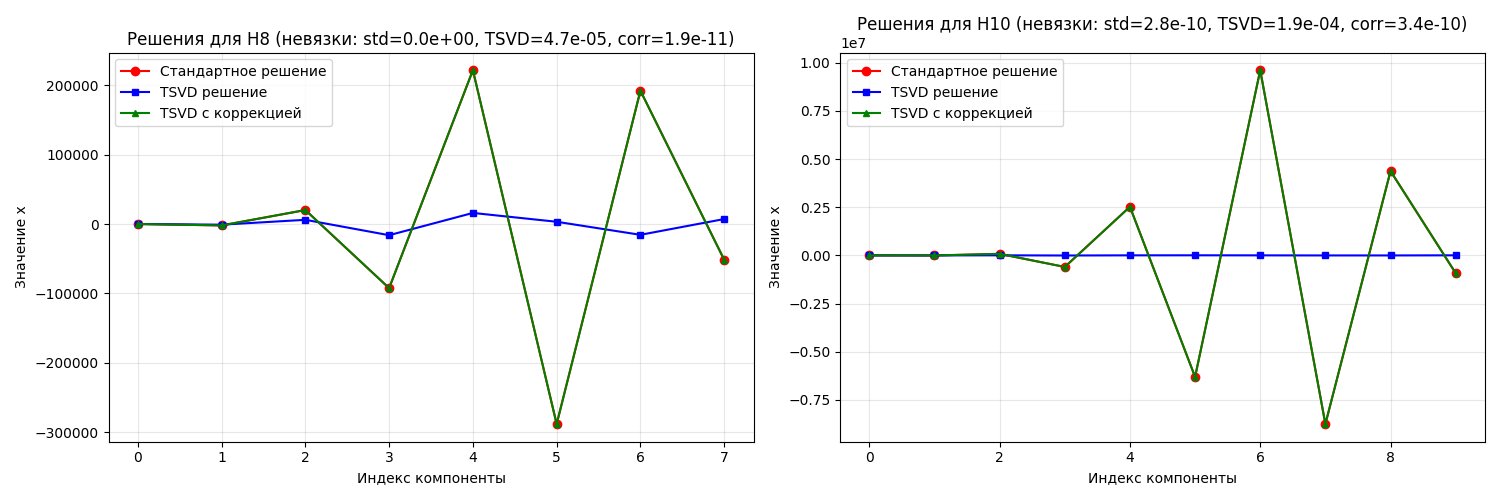

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1.0 / (i + j + 1)
    return H

def tsvd_corrected_solve(A, b, epsilon=1e-8):

    U, s, Vt = np.linalg.svd(A, full_matrices=True)
    V = Vt.T
    
    r = np.sum(s > epsilon)
    
    x_tsvd = np.zeros(A.shape[1])
    for i in range(r):
        x_tsvd += (U[:, i] @ b) / s[i] * V[:, i]
    
    n = A.shape[1]
    if r < n:
        U_tsvd = U[:, :r]
        V_tsvd = V[:, :r]
        
        U_add = U[:, r:]
        V_add = V[:, r:]
        
        C = U_add.T @ A @ V_add
        b2 = U_add.T @ b
        
        try:
            z2 = np.linalg.solve(C, b2)
            
            x_corrected = x_tsvd + V_add @ z2
            return x_corrected, x_tsvd, r
        except np.linalg.LinAlgError:
            return x_tsvd, x_tsvd, r
    else:
        return x_tsvd, x_tsvd, r

H8 = hilbert_matrix(8)
b8 = np.array([1.0] + [0.0] * (7))

x_standard8 = np.linalg.solve(H8, b8)
residual_standard8 = np.linalg.norm(H8 @ x_standard8 - b8)

x_corrected8, x_tsvd8, r8 = tsvd_corrected_solve(H8, b8)

residual_corrected8 = np.linalg.norm(H8 @ x_corrected8 - b8)
residual_tsvd8 = np.linalg.norm(H8 @ x_tsvd8 - b8)

H10 = hilbert_matrix(10)
b10 = np.array([1.0] + [0.0] * (9))

x_standard10 = np.linalg.solve(H10, b10)
residual_standard10 = np.linalg.norm(H10 @ x_standard10 - b10)

x_corrected10, x_tsvd10, r10 = tsvd_corrected_solve(H10, b10)

residual_corrected10 = np.linalg.norm(H10 @ x_corrected10 - b10)
residual_tsvd10 = np.linalg.norm(H10 @ x_tsvd10 - b10)


for n in [8, 10]:
    H = hilbert_matrix(n)
    s = np.linalg.svd(H, compute_uv=False)
    print(f"\nСингулярные числа H_{n}:")
    for i, sigma in enumerate(s):
        print(f"  σ_{i+1} = {sigma:.3e}")
    print(f"  min(σ) = {s.min():.3e}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
index = np.arange(8)
plt.plot(index, x_standard8, 'ro-', label='Стандартное решение', markersize=6)
plt.plot(index, x_tsvd8, 'bs-', label='TSVD решение', markersize=4)
plt.plot(index, x_corrected8, 'g^-', label='TSVD с коррекцией', markersize=4)
plt.xlabel('Индекс компоненты')
plt.ylabel('Значение x')
plt.title(f'Решения для H8 (невязки: std={residual_standard8:.1e}, TSVD={residual_tsvd8:.1e}, corr={residual_corrected8:.1e})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
index = np.arange(10)
plt.plot(index, x_standard10, 'ro-', label='Стандартное решение', markersize=6)
plt.plot(index, x_tsvd10, 'bs-', label='TSVD решение', markersize=4)
plt.plot(index, x_corrected10, 'g^-', label='TSVD с коррекцией', markersize=4)
plt.xlabel('Индекс компоненты')
plt.ylabel('Значение x')
plt.title(f'Решения для H10 (невязки: std={residual_standard10:.1e}, TSVD={residual_tsvd10:.1e}, corr={residual_corrected10:.1e})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

x = np.linspace(-5, 5, 200)
noise = 0.1*np.random.normal(size = x.shape)
y_label = np.cos(x) + noise

def create_X(x, m):
    x = x.reshape(-1, 1)
    
    X = np.ones((len(x), 1))
    
    for i in range(1, m + 1):
        X = np.concatenate([X, np.cos(i * x)], axis=1)
    return X

def fit(x, y_label, m):
    X = create_X(x, m)
    w = np.linalg.pinv(X) @ y_label
    return w

def predict(x, w):
    m = len(w) - 1  
    X = create_X(x, m)
    return X @ w


# Функция ошибки MSE для модели (которая полностью определяется предсказаниями модели и y_label)
def MSE(y, y_label):
    return np.sum((y - y_label)**2) / np.size(y)

ws = []
m = []

for m in range(140):
    w = fit(x, y_label, m)
    ws.append(w)
    y_predict = predict(x, w)
    m.append(MSE(y_predict, ))
    


for 1 MSE is 0.4404023947039266
for 2 MSE is 0.008687738883111959
for 3 MSE is 0.008684939902727335
for 4 MSE is 0.008661451286968484
for 5 MSE is 0.008419822945045181
for 6 MSE is 0.008314844140955456
for 7 MSE is 0.00831358966336086
for 8 MSE is 0.008313580751007181
for 9 MSE is 0.008299562057622641
for 10 MSE is 0.008290514913135054
for 11 MSE is 0.00805352174835992
for 12 MSE is 0.00804776808783675
for 13 MSE is 0.008046806167695042
for 14 MSE is 0.008044547984432302
for 15 MSE is 0.008042128052464528
for 16 MSE is 0.008037648273389889
for 17 MSE is 0.008032944237738598
for 18 MSE is 0.008003877964576779
for 19 MSE is 0.007996576761290097
for 20 MSE is 0.007980922130330694
for 21 MSE is 0.007962762469898112
for 22 MSE is 0.00785040013590737
for 23 MSE is 0.007846099083964699
for 24 MSE is 0.00782732954540446
for 25 MSE is 0.007826360138079807
for 26 MSE is 0.007816108769037529
for 27 MSE is 0.007778545271693522
for 28 MSE is 0.007741313580611213
for 29 MSE is 0.007739426636905224
f

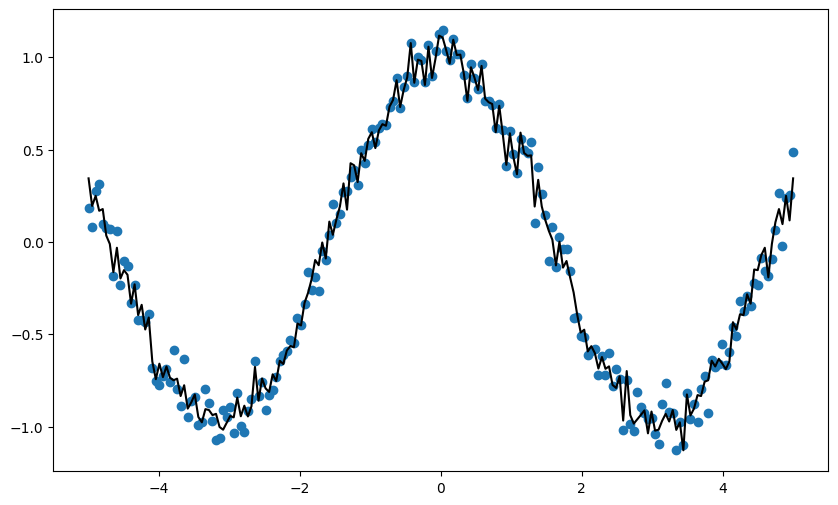

In [89]:
def create_cosine_basis(x, j):
    n = len(x)
    basis = np.ones((n, j + 1)) 
    
    for i in range(1, j + 1):
        basis[:, i] = np.cos(i * x)
    
    return basis

def predict_with_basis(x, w, j):
    basis = create_cosine_basis(x, j)
    return basis @ w

j = 139
cosine_basis = create_cosine_basis(x, j)

w = ws[j]

y_5 = cosine_basis @ w

plt.figure(figsize=(10, 6))
plt.scatter(x, y_label)
plt.plot(x, y_5, c='k')
plt.show()

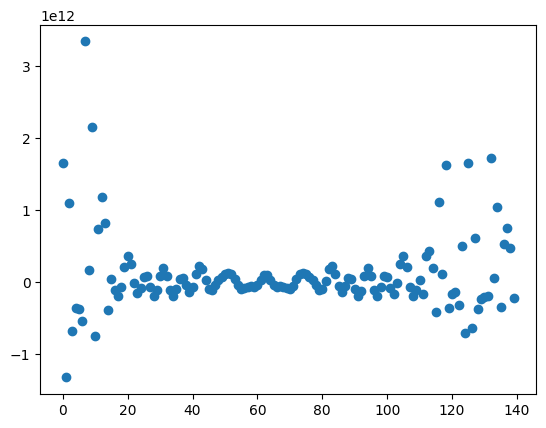

In [90]:
plt.scatter(np.arange(len(ws[j])), ws[j])

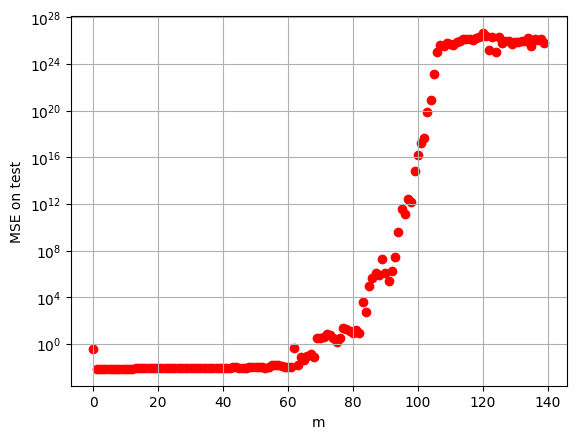

In [91]:
import matplotlib.pyplot as plt
from sklearn import model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x, y_label, test_size=0.3) 

for m in range(140):

    w = fit(x_train, y_train, m)
    
    y_test_predict = predict(x_test, w)

    error = MSE(y_test_predict, y_test)
    

    plt.scatter(m, error, c='red')
    plt.semilogy()

    plt.grid(True)

    plt.ylabel("MSE on test")
    plt.xlabel("m")